,Length,Sort Time,Linear Time,Binary Time,Binary + Sort Time
Set 1,512,0.1784,0.0824,0.0074,0.1858
Set 2,1024,0.0656,0.0679,0.0048,0.0704
Set 3,2048,0.0996,0.2959,0.0046,0.1042
Set 4,4096,0.2494,0.4843,0.0047,0.2541
Set 5,8192,0.3894,1.9071,0.0048,0.3942


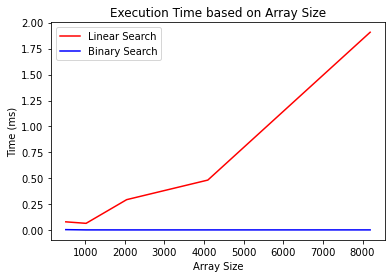

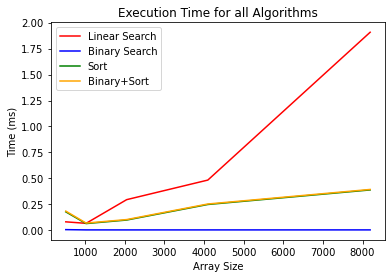

In [33]:
import numpy as np
import pandas as pd
import time
import timeit
import matplotlib.pyplot as plt

from random import seed
from random import random



def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1  #high = 4


    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2  #mid = 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
    # The guess was too high.
      if guess > item:
        high = mid - 1  #high = 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        
    return None


def get_sort_time(array):
    start_time = time.perf_counter()
    array = np.sort(array)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc

def get_binary_time(array, num):
    start_time = time.perf_counter()
    binary_search(array, num)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc

def get_linear_time(array, num):
    start_time = time.perf_counter()
    linear_search(array, num)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc


np.random.seed(3) 

set1 = np.random.uniform(1,10000,512)
set2 = np.random.uniform(1,10000,1024)
set3 = np.random.uniform(1,10000,2048)
set4 = np.random.uniform(1,10000,4096)
set5 = np.random.uniform(1,10000,8192)

#first get sort times for the arrays
sort_time1 = (get_sort_time(set1))
sort_time2 = (get_sort_time(set2))
sort_time3 = (get_sort_time(set3))
sort_time4 = (get_sort_time(set4))
sort_time5 = (get_sort_time(set5))



#get max number for each set
max1 = max(set1)
max2 = max(set2)
max3 = max(set3)
max4 = max(set4)
max5 = max(set5)

#next get binary search times:

bs_time1 = (get_binary_time(set1, max1))
bs_time2 = (get_binary_time(set2, max2))
bs_time3 = (get_binary_time(set3, max3))
bs_time4 = (get_binary_time(set4, max4))
bs_time5 = (get_binary_time(set5, max5))


#Now get linear search times
ls_time1 = (get_linear_time(set1, max1))
ls_time2 = (get_linear_time(set2, max2))
ls_time3 = (get_linear_time(set3, max3))
ls_time4 = (get_linear_time(set4, max4))
ls_time5 = (get_linear_time(set5, max5))


run_times = {'Length': [len(set1), len(set2), len(set3), len(set4), len(set5)],
            'Sort Time': [sort_time1, sort_time2, sort_time3, sort_time4, sort_time5],
            'Linear Time': [ls_time1, ls_time2, ls_time3, ls_time4, ls_time5],
            'Binary Time': [bs_time1, bs_time2, bs_time3, bs_time4, bs_time5],
            'Binary + Sort Time': [bs_time1 + sort_time1, bs_time2 + sort_time2, bs_time3 + sort_time3, bs_time4 + sort_time4, bs_time5 + sort_time5]
            }

#create table
df = pd.DataFrame(run_times, columns = ['Length','Sort Time','Linear Time','Binary Time','Binary + Sort Time'],
                  index=['Set 1','Set 2','Set 3','Set 4','Set 5'])
display(df)

#create plot
ax1 = plt.gca()
df.plot(kind = 'line',y='Linear Time',x='Length',color='red', label = 'Linear Search', ax = ax1)
df.plot(kind = 'line',y='Binary Time',x='Length',color='blue', label = 'Binary Search', ax = ax1)
plt.xlabel('Array Size')
plt.ylabel('Time (ms)')
plt.title('Execution Time based on Array Size')
plt.show()

#create 2nd plot
ax2 = plt.gca()
df.plot(kind = 'line',y='Linear Time',x='Length',color='red', label = 'Linear Search', ax = ax2)
df.plot(kind = 'line',y='Binary Time',x='Length',color='blue', label = 'Binary Search', ax = ax2)
df.plot(kind = 'line',y='Sort Time',x='Length',color='green', label = 'Sort', ax = ax2)
df.plot(kind = 'line',y='Binary + Sort Time',x='Length',color='orange', label = 'Binary+Sort', ax = ax2)
plt.xlabel('Array Size')
plt.ylabel('Time (ms)')
plt.title('Execution Time for all Algorithms')
plt.show()





In [9]:
"""
The results of the first plot (Execution Time based on Array Size) shows that the amount of time needed to do a linear search and locate the correct item
will increase as the size of the array increases.  This is clearly shown by the red line, which continues to grow in an 
upward fashion towards the upper right of the plot.  On the other hand, a binary search can be much more efficient as the size
of the array grows.  This is evidenced by the relatively flat blue line in the plot - as the array gets larger, the amount of time needed
to locate the item remains very low.

The second plot (Execution Time for all Algorithms) displays the linear and binary search execution results from the first plot as
well as the execution times to sort the arrays (green line) as well as the sort plus binary execution times (yellow line).  
It appears that it actually takes longer to sort the array as opposed to finding the item in the array using a binary search. 
(Note: I was seeing the sort execution exponentially getting slower as the data set grew, which is what I would expect it to do.
But for some reason, I'm not able to replicate that anymore in the results, as it seems to be getting slightly faster each time
the data grows).


SUMMARY:

    As shown in the above plots, it is clear that the binary search method is superior to the linear search method in terms of
execution time.  This is especially true as the size of the searchable dataset grows.  

    These search results are prime examples of the importance of Big O notation in algorithm performance.  Big O notation is 
essentially a measure of algorithm performance, or namely, how run times can grow at different rates.  A linear search, which is 
pretty much checking every item in the dataset one by one, loses efficiency as the dataset grows as shown by the red lines in the 
plots above.  A binary search will exponentially get faster as the size of the dataset increases.  On the other hand, a sorting 
algorithm will exponentially slow down (again...not reflected in the data) as the dataset gets larger.  When 
building search algorithms, data engineers need to keep these notions in mind while taking into account the size of the dataset 
to be searched.

"""

'\nThe results of the first plot (Execution Time based on Array Size) shows that the amount of time needed to do a linear search and locate the correct item\nwill increase as the size of the array increases.  This is clearly shown by the red line, which continues to grow in an \nupward fashion towards the upper right of the plot.  On the other hand, a binary search can be much more efficient as the size\nof the array grows.  This is evidenced by the relatively flat blue line in the plot - as the array gets larger, the amount of time needed\nto locate the item remains very low.\n\nThe second plot (Execution Time for all Algorithms) displays the linear and binary search execution results from the first plot as\nwell as the execution times to sort the arrays (green line) as well as the sort plus binary execution times (yellow line).  \nIt appears that it actually takes longer to sort the array as opposed to finding the item in the array using a binary search. Also,\nthe performance of the